### Importing Libraries

In [1]:
#Import Libraries
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Creating Dictionary

In [2]:
#Creating a dictionary that sorts and stores all the URLs

athlete_records = {
    'Mens Volleyball': ['https://ccnyathletics.com/sports/mens-volleyball/roster?view=2', 'https://lehmanathletics.com/sports/mens-volleyball/roster?view=2', 'https://www.brooklyncollegeathletics.com/sports/mens-volleyball/roster?view=2', 'https://johnjayathletics.com/sports/mens-volleyball/roster?view=2', 'https://athletics.baruch.cuny.edu/sports/mens-volleyball/roster?view=2', 'https://mecathletics.com/sports/mens-volleyball/roster?view=2', 'https://www.huntercollegeathletics.com/sports/mens-volleyball/roster?view=2', 'https://yorkathletics.com/sports/mens-volleyball/roster?view=2', 'https://ballstatesports.com/sports/mens-volleyball/roster?view=2'],
    'Mens Swimming': ['https://csidolphins.com/sports/mens-swimming-and-diving/roster?view=2', 'https://yorkathletics.com/sports/mens-swimming-and-diving/roster?view=2', 'https://athletics.baruch.cuny.edu/sports/mens-swimming-and-diving/roster?view=2', 'https://www.brooklyncollegeathletics.com/sports/mens-swimming-and-diving/roster?view=2', 'https://lindenwoodlions.com/sports/mens-swimming-and-diving/roster?view=2', 'https://mckbearcats.com/sports/mens-swimming-and-diving/roster?view=2', 'https://ramapoathletics.com/sports/mens-swimming-and-diving/roster?view=2', 'https://oneontaathletics.com/sports/mens-swimming-and-diving/roster?view=2', 'https://bubearcats.com/sports/mens-swimming-and-diving/roster/2021-22?view=2', 'https://albrightathletics.com/sports/mens-swimming-and-diving/roster/2021-22?view=2'],
    'Womens Volleyball': ['https://bmccathletics.com/sports/womens-volleyball/roster?view=2', 'https://yorkathletics.com/sports/womens-volleyball/roster?view=2', 'https://hostosathletics.com/sports/womens-volleyball/roster?view=2', 'https://bronxbroncos.com/sports/womens-volleyball/roster/2021?view=2', 'https://queensknights.com/sports/womens-volleyball/roster?view=2', 'https://augustajags.com/sports/wvball/roster?view=2', 'https://flaglerathletics.com/sports/womens-volleyball/roster?view=2', 'https://pacersports.com/sports/womens-volleyball/roster?view=2', 'https://www.golhu.com/sports/womens-volleyball/roster?view=2'],
    'Womens Swimming': ['https://csidolphins.com/sports/womens-swimming-and-diving/roster?view=2', 'https://queensknights.com/sports/womens-swimming-and-diving/roster?view=2', 'https://yorkathletics.com/sports/womens-swimming-and-diving/roster?view=2', 'https://athletics.baruch.cuny.edu/sports/womens-swimming-and-diving/roster/2021-22?path=wswim?view=2', 'https://www.brooklyncollegeathletics.com/sports/womens-swimming-and-diving/roster?view=2', 'https://lindenwoodlions.com/sports/womens-swimming-and-diving/roster?view=2', 'https://mckbearcats.com/sports/womens-swimming-and-diving/roster?view=2', 'https://ramapoathletics.com/sports/womens-swimming-and-diving/roster?view=2', 'https://keanathletics.com/sports/womens-swimming-and-diving/roster?view=2', 'https://oneontaathletics.com/sports/womens-swimming-and-diving/roster?view=2']
}

### Creating Function

In [3]:
#create function to scrape names & heights
def web_scraper(url_lists):

#make empty lists for names and heights to be appended into
    scraped_names = []
    scraped_heights = []

    #create loop for each url in the list
    for url in url_lists:
        page = requests.get(url)

        #loop proceeds if connection is successful
        if page.status_code == 200:
            soup = BeautifulSoup(page.content, 'html.parser')

            #extracting all td tags with height class
            raw_height = soup.find_all('td', class_ ='height')

            #extracting all td tags with name class
            raw_name = soup.find_all('td', class_ = 'sidearm-table-player-name')

            #using 1 loop to scrape names & heights
            for i in range(len(raw_height)):
                name = raw_name[i].get_text().strip('\n')
                height = raw_height[i].get_text().strip('\n')

                #putting scraped names in the scraped_names list
                scraped_names.append(name)

                #replacing dash with a NaN
                if height == '-':
                    height = np.nan
                else:
                #Otherwise, extract feet & inches as float. Then convert entire height into inches
                    height = height.split('-')
                    feet = float(height[0])
                    inches = float(height[1])
                    height = feet*12 + inches
                
                #putting converted height into scraped_heights list
                scraped_heights.append(height)
            
            #building the dataframe
            athletes_heights = {'Names': scraped_names, 'Height': scraped_heights}
            athletes_heights_df = pd.DataFrame(athletes_heights)
    
    #Export dataframe to a CSV. Removes index numbers yet keeps athletes in same positions.
    athletes_heights_df.to_csv('AthleteHeights.csv', index=False)

    #Setup mean calculation
    mean_value = athletes_heights_df['Height'].mean()

    #Find 5 tallest heights by removing duplicate heights and selecting the 5 largest values
    tallest_heights = athletes_heights_df['Height'].drop_duplicates().sort_values(ascending=False).nlargest(5)
    #Refer to original database and check which heights are in tallest_heights. Create dataframe from this.
    tallest_heights_df = athletes_heights_df[athletes_heights_df['Height'].isin(tallest_heights)]
    #Sorts dataframe for tallest heights in descending order. Then covert into list
    tallest_heights_list = tallest_heights_df.sort_values(by='Height', ascending=False).values.tolist()

    #Find 5 shortest heights by removing duplicate heights and selecting the 5 smallest values
    shortest_heights = athletes_heights_df['Height'].drop_duplicates().nsmallest(5)
    #Refer to original database and check which heights are in shortest_heights. Create dataframe from this.
    shortest_heights_df = athletes_heights_df[athletes_heights_df['Height'].isin(shortest_heights)]
    #Sort height in ascending order for the shortest heights. Then convert into list
    shortest_heights_list = shortest_heights_df.sort_values(by='Height').values.tolist()

    #returning desired variables to be calculated in this function. Input must be in this order.
    #Allows user to set multiple variables with one function.
    return athletes_heights_df, mean_value, tallest_heights_list, shortest_heights_list

### Men Volleyball Team

In [4]:
#Sets variables for all men in volleyball, the average height, and the 5 tallest and shortest heights.
#URL is inputted into the web_scraper function
all_men_volleyball, all_men_volleyball_avg, men_volleyball_tallest, men_volleyball_shortest = web_scraper(athlete_records['Mens Volleyball'])

In [5]:
#Prints the list of names and heights of men volleyball players who have the 5 tallest heights
#Asterisk used to return values one at a time. Used with seperator to make list easier to read, not in 1 line.
#Format used for all other lists for 5 tallest/shortest heights below.
print(*men_volleyball_tallest, sep='\n')

['Will  Patterson', 82.0]
['Patrick Rogers', 79.0]
['Kyle Barriffe-Johnson', 79.0]
['Akil Vaughn', 79.0]
['Griffin Satterfield', 79.0]
['Peter  Zurawski', 78.0]
['Matisse Lee-Maarek', 78.0]
['Tinaishe Ndavazocheva', 78.0]
['Dyer Ball', 78.0]
['Eyal Rawitz', 78.0]
['Machado Lucas', 78.0]
['Vanis Buckholz', 78.0]
['Trevor Phillips', 78.0]
['Rodney Wallace', 78.0]
['Jimmy Chang', 78.0]
['Austinson Cooke', 77.0]
['Haoxin Hu', 77.0]
['Jack Nugent', 77.0]
['Marty Canavan', 77.0]
['Ryan Bartz', 77.0]
['Carlos Rodriguez', 76.0]
['Aleksandr  Howard', 76.0]
['Jason Lin', 76.0]
['Michael Higgins', 76.0]
['Steven Ajazi', 76.0]
['Nathan Goh', 76.0]
['Wil McPhillips', 76.0]
['Rudy Janga', 76.0]
['Akashdeep Singh', 76.0]
['Keau Thompson', 76.0]
['Armand  Kaloshi', 76.0]


In [6]:
#Prints the list of names and heights of men volleyball players who have the 5 shortest heights
print(*men_volleyball_shortest, sep='\n')

['Angel Gabriel Chabla', 63.0]
['Chris  Mata', 63.0]
['Bryce Glasper', 64.0]
['Jonathan  Liao', 65.0]
['Dion  Csikortos', 65.0]
['Wai  Lin', 65.0]
['Naoki Tani', 67.0]
['Carlos Llivicura', 67.0]
['Jimmy Evans', 67.0]
['Christian Agudo', 67.0]
['Ray Rodriguez', 67.0]
['David Reyes Galvez', 67.0]
['Miguel Gonzalez', 67.0]
['Xander Pink', 67.0]
['Stanley  Sanchez', 68.0]
['Sebastian Rodriguez', 68.0]
['Daniel Gonzalez Verdejo', 68.0]
['Evan Wandersee', 68.0]
['David Lema', 68.0]
['Edwin Fierros Gaytan', 68.0]
['Jerome Galam', 68.0]
['Carlos Abreu', 68.0]
['Jubril Okunlola', 68.0]
['Raymond Yu', 68.0]
['Abubakar Khamis', 68.0]


### Men Swimmers

In [7]:
#Sets variables for all men in swimming, the average height, and the 5 tallest and shortest heights.
#URL is inputted into the web_scraper function
all_men_swimming, all_men_swimming_avg, men_swimming_tallest, men_swimming_shortest = web_scraper(athlete_records['Mens Swimming'])

In [8]:
#Shows list of names and heights of men swimmers who have the 5 tallest heights
print(*men_swimming_tallest, sep='\n')

['Colton Grimes', 79.0]
['Tyson Upton', 79.0]
['Eric Kroon', 77.0]
['Mattia Giurgevich', 76.0]
['Adam Szcerba', 76.0]
['Nicholas Griffith', 76.0]
['Brian Harding', 76.0]
['Matthew Stooke', 76.0]
['Henry Shemet', 75.0]
['Patryk Rozenek', 75.0]
['Joe Swede', 75.0]
['Jack Hill', 75.0]
['Youssef  Elkhouly', 75.0]
['Ryan Maierle', 75.0]
['Ethan Hanson', 75.0]
['Owen Brubaker', 75.0]
['Peter Vanderwerf', 75.0]
['Robert Reining', 74.0]
['Justin Meyn', 74.0]
['Elijah Lanfear', 74.0]
['Matthew Palguta', 74.0]
['Gary Danilyan', 74.0]
['Cosmo Martinelli', 74.0]
['Thomas Breen', 74.0]
['Nathan Pollard', 74.0]
['Patrick Cramer', 74.0]
['Elliott Irwin', 74.0]
['Ryan Boeding', 74.0]
['Isaac Zambrano', 74.0]
['Abdul  Khan', 74.0]
['Noah Tague', 74.0]


In [9]:
#Shows list of names and heights of men swimmers who have the 5 shortest heights
print(*men_swimming_shortest, sep='\n')

['Miles Fleischer', 63.0]
['Charles Cusumano', 64.0]
['Joseph Scarpetta ', 65.0]
['Wyatt Kurtz', 65.0]
['Samuel De Leon', 65.0]
['Tyler Canteen', 66.0]
['AJ Guevara', 66.0]
['James  Llewellyn', 66.0]
['Zachary Ciriaco', 66.0]
['Christopher Egan', 66.0]
['Eslam Hussein', 67.0]
['Sam Rozenfeld', 67.0]
['Mason Enthoven', 67.0]


### Women Volleyball Team

In [10]:
#Sets variables for all women in volleyball, the average height, and the 5 tallest and shortest heights.
#URL is inputted into the web_scraper function
all_women_volleyball, all_women_volleyball_avg, women_volleyball_tallest, women_volleyball_shortest = web_scraper(athlete_records['Womens Volleyball'])

In [11]:
#Shows list of names and heights of women volleyball players who have the 5 tallest heights.
print(*women_volleyball_tallest, sep='\n')

['Kayli Cleaver', 76.0]
['Alyssa Daley', 75.0]
['Savannah  Davis', 75.0]
['Sophia Kruczko', 75.0]
['Molly Boyd', 75.0]
['Madelyn Eden', 74.0]
['Lauren Posa', 73.0]
['Jada Suguturaga', 73.0]
['Meredith Dixon', 73.0]
['Lindsay Osterhoudt', 73.0]
['Audrey Simmons', 73.0]
['Maeson Peterson', 73.0]
['Anna Sommer', 73.0]
['Alli Bishop', 72.0]
['Cat Bodick', 72.0]
['Jachimma Onwuamaegbu', 72.0]
['Alisha Pitt', 72.0]
['Colby Stempkowski', 72.0]


In [12]:
#Shows list of names and heights of women volleyball players who have the 5 shortest heights.
print(*women_volleyball_shortest, sep='\n')

['Samara Correa', 60.0]
['Yisneily  Morales', 61.0]
['Garyana Altidor', 61.0]
['Rashel Torres', 61.0]
['Izabella De Lima', 61.0]
['Jasmine  Vega', 61.0]
['Salma Villa  Morales', 62.0]
['Genesis Sigaran', 62.0]
['Brianna Rodriguez', 62.0]
['Shamonie Miller', 62.0]
['Justine Pomales', 63.0]
['Teonnie Blake', 63.0]
['Sarah Munn', 63.0]
['Kaitlyn Houck', 63.0]
['Devina  Luckhoo', 63.0]
['Nyla  Rivera', 63.0]
['Brooke Singleton', 64.0]
['Dariana  Luna', 64.0]
['Maynee De Los Santos', 64.0]
['Crystal Saw', 64.0]
['Marisabel Pujols', 64.0]
['Sahara Ramos', 64.0]
['Natalie Mora', 64.0]
['Mariali Sosa', 64.0]
['Kamya Hayes', 64.0]
['Cheyenne Gray-Taitt', 64.0]
['Nicole  Rosas', 64.0]
['Myka Costanzo', 64.0]


### Women Swimmers

In [13]:
#Sets variables for all men in swimming, the average height, and the 5 tallest and shortest heights.
#URL is inputted into the web_scraper function
all_women_swimming, all_women_swimming_avg, women_swimming_tallest, women_swimming_shortest = web_scraper(athlete_records['Womens Swimming'])

In [14]:
#Shows list of names and heights of women swimmers who have the 5 tallest heights.
print(*women_swimming_tallest, sep='\n')

['McKenzie Fazio', 75.0]
['Maja Piotrowicz', 73.0]
['Presley Heitzmann', 71.0]
['Kornelia Buszka', 71.0]
['Grace Geyer', 71.0]
['Karley Sonnenberg', 70.0]
['Victoria Maki', 70.0]
['Jocelyn Zgola', 70.0]
['Grace Korey', 70.0]
['Gabriela Novais Lima', 70.0]
['Stephanie Marks', 70.0]
['Adi Luker', 70.0]
['Teagan Powell', 69.0]
['Brianna Shaw', 69.0]
['Ashley Brousseau', 69.0]
['Alison Jorolemon', 69.0]
['Lena Nakken', 69.0]
['Vivian Ravines', 69.0]
['Katherine Ebrahim', 69.0]
['Alexis Kachkin', 69.0]
['Edna Melendez', 69.0]
['Lyssa Wood', 69.0]
['Joselle Mensah', 69.0]
['Adison Marshall', 69.0]
['Megan Hollaar', 69.0]
['Morgen Frausto', 69.0]
['Razzaine Williams', 69.0]
['Bianca Hiltz', 69.0]
['Raina Willie', 69.0]


In [15]:
#Shows list of names and heights of women swimmers who have the 5 shortest heights.
print(*women_swimming_shortest, sep='\n')

['Melanie Rodriguez', 59.0]
['Micaela Reyes', 59.0]
['Asha Besaw', 61.0]
['Camila Mercado', 61.0]
['Taylor Jacobson', 61.0]
['Kristen Flores', 61.0]
['Valeria Pages', 61.0]
['Keila Fane', 62.0]
['Maddy Joe', 62.0]
['Magdalen Swat', 62.0]
['Sophia Olson', 62.0]
['Julia Caramagna', 62.0]
['Fatima Morrobel', 62.0]
['Kylie Tininenko', 62.0]
['Cadence  Dudley', 62.0]
['Deanna Soueid', 62.0]
['Cami Yovich', 62.0]
['Abbie Masters', 63.0]
['Aurelia Barbagallo', 63.0]
['Terrah DeLorimiere', 63.0]
['Laura Cruz Rosario', 63.0]
['Jillian Etnel', 63.0]
['Beata Maruszczyk', 63.0]
['Atzi Gomez', 63.0]
['Helena  Kurtz', 64.0]
['Anna Guzzo', 64.0]
['Katarina Tsirlin', 64.0]
['Rory Chea', 64.0]
['Emperatriz Cesar', 64.0]
['Melanie Guerrero', 64.0]
['Chloe  Pearson', 64.0]
['Ashley Richard', 64.0]
['Ana Cecilia Carvalho', 64.0]
['Fifi  Amanuel', 64.0]
['Andrea  Menard Cordoba', 64.0]
['Jamelia Jordan', 64.0]
['Callie Stinson', 64.0]


### Average heights for each team

In [16]:
#Prints average height for each team
print('The average height for all men volleyball teams is', round(all_men_volleyball_avg, 2), 'inches\n')

print('The average height for all men swimming teams is', round(all_men_swimming_avg, 2), 'inches\n')

print('The average height for all women volleyball teams is', round(all_women_volleyball_avg, 2), 'inches\n')

print('The average height for all women swimming teams is', round(all_women_swimming_avg, 2), 'inches\n')

The average height for all men volleyball teams is 72.21 inches

The average height for all men swimming teams is 71.36 inches

The average height for all women volleyball teams is 67.66 inches

The average height for all women swimming teams is 66.05 inches



### Creating Bar Graph of Averages

In [17]:
#Create dictionary to associate the average height with its proper team.
avg_heights = {'Team Type':['Mens Volleyball', 'Mens Swimming', 'Womens Volleyball', 'Womens Swimming'],
               'Avg Height':[all_men_volleyball_avg, all_men_swimming_avg, all_women_volleyball_avg, all_women_swimming_avg]
}

In [18]:
#Creates dataframe for average height dictionary
avg_heights_df = pd.DataFrame(avg_heights)

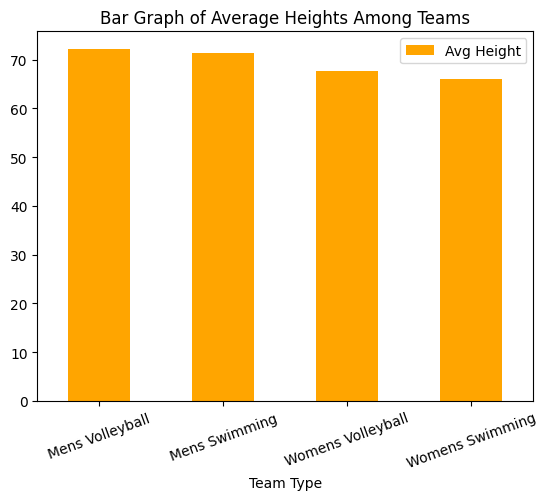

In [19]:
#Uses average height dataframe to create a bar chart.
#Makes sure axes are the same, rotation to prevent overlap, and change color as desired. Then show bar chart to copy.
avg_heights_df.plot.bar(x='Team Type', y='Avg Height', rot = 20, title = 'Bar Graph of Average Heights Among Teams', color='orange')
plt.show()